In [1]:
import cv2
import numpy as np
import time
path=(input("Enter the Path of File:"))
img=cv2.imread(path,1)
dict_1={1:'Gray scale image',2:'Binary image',3:'Blue',4:'smoothing the image',5:'Blurring the image',6:'Detecting the edge of image',7:'saturation',8:'Green',9:'Red',10:'Value',11:'Hue',12:'cropping the image',13:'Doubling the image',14:'Transposing the image',15:'Face Detection'}
height=img.shape[0]
width=img.shape[1]
for i in range(1,len(dict_1)+1):
    print(i,'.',dict_1.get(i))
while(True):
    num=input('Enter the number which type of image you want:')
    cv2.imshow('image',img)
    if num=='1':
        img1=cv2.imread(path,0)
        cv2.imshow('image',img1)
    elif num=='2':
        ret,bw=cv2.threshold(img,127,255,cv2.THRESH_BINARY)#through thresholding we will try to provide the value the value through which we can put below the particular value we assign the value 0 and above it will be white. 
        cv2.imshow("Binary",bw)
        img1=bw
    elif num=='3':
        B,G,R=cv2.split(img)
        zeros=np.zeros((height,width),dtype="uint8")
        cv2.imshow("Blue",cv2.merge([B,zeros,zeros]))
        img1=cv2.merge([B,zeros,zeros])
    elif num=='4':
        bilateral=cv2.bilateralFilter(img,7,20,20)#9 ,75 and 75 are sigma color value and sigma space value affects cordinates space and color space 
        cv2.imshow("bilateral",bilateral)
        img1=bilateral
    elif num=='5':
        gaussian=cv2.GaussianBlur(img,(7,7),0)
        cv2.imshow("GaussianBlur",gaussian)
        img1=gaussian
    elif num=='6':
        canny=cv2.Canny(img,20,170)#This demand two thresholds from us i.e; 20 and 170 this is like lower and upper value 
        cv2.imshow("canny",canny)
        img1=canny
    elif num=='7':
        img_HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        cv2.imshow("saturation",img_HSV[:,:,1])
        img1=img_HSV[:,:,1]
    elif num=='8':
        B,G,R=cv2.split(img)
        zeros=np.zeros((height,width),dtype="uint8")
        cv2.imshow("Green",cv2.merge([zeros,G,zeros]))
        img1=cv2.merge([zeros,G,zeros])
    elif num=='9':
        B,G,R=cv2.split(img)
        zeros=np.zeros((height,width),dtype="uint8")
        cv2.imshow("Red",cv2.merge([zeros,zeros,R]))
        img1=cv2.merge([zeros,zeros,R])
    elif num=='10':
        img_HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        cv2.imshow("valuechannel",img_HSV[:,:,2])
        img1=img_HSV[:,:,2]
    elif num=='11':
        img_HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        cv2.imshow("Hue",img_HSV[:,:,0])
        img1=img_HSV[:,:,0]
    elif num=='12':
        height,width=img.shape[:2]
        start_row,start_col=int(height*0.10),int(width*0.10)#starting pixel coordinates (topleft,of cropping rectangles)
        end_row,end_col=int(height*0.86),int(width*0.86)#ending pixel coordinates (bottom right),this can be changed
        cropped=img[start_row:end_row,start_col:end_col]
        cv2.imshow('cropped',cropped)
        img1=cropped
    elif num=='13':
        resized=cv2.resize(img,(int(img.shape[1]*1.5),int(img.shape[0]*1.5)))#converting the float value into integer value
        cv2.imshow('resize',resized)
        img1=resized
    elif num=='14':
        rotation_image=cv2.transpose(img)#this will covert the image of horizontal pixel elements into vertical pixel elements as in matrix
        cv2.imshow("legend",rotation_image)
        img1=rotation_image
    elif num=='15':
        face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
        gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray_img,scaleFactor=1.06,minNeighbors=6)
        for x,y,w,h in faces:
            img1=cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.imshow("Gray",img1)
    else:
        print('invalid input')
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    save=input('Do you want to save?y/n')
    if save=='y':
        file=input('Enter the image name to be saved')
        cv2.imwrite(file+'.jpg',img1)
    elif save=='n':
        print('its ok')
    else:
        print('invalid input')
    a=input('Do you break?y/n')
    if a=='y':
        break
    elif a=='n':
        print('its ok')
    else:
        print('invalid input')
        pass 

Enter the Path of File:C:\Users\Sai charan\Desktop\aaic\opencv\Count_of_Objects\image.jpg
1 . Gray scale image
2 . Binary image
3 . Blue
4 . smoothing the image
5 . Blurring the image
6 . Detecting the edge of image
7 . saturation
8 . Green
9 . Red
10 . Value
11 . Hue
12 . cropping the image
13 . Doubling the image
14 . Transposing the image
15 . Face Detection
Enter the number which type of image you want:1
Do you want to save?y/ny
Enter the image name to be savedgray
Do you break?y/nn
its ok
Enter the number which type of image you want:2
Do you want to save?y/ny
Enter the image name to be savedbinary
Do you break?y/nn
its ok
Enter the number which type of image you want:3
Do you want to save?y/ny
Enter the image name to be savedblue
Do you break?y/nn
its ok
Enter the number which type of image you want:4
Do you want to save?y/ny
Enter the image name to be savedsmoothing
Do you break?y/nn
its ok
Enter the number which type of image you want:5
Do you want to save?y/ny
Enter the image 

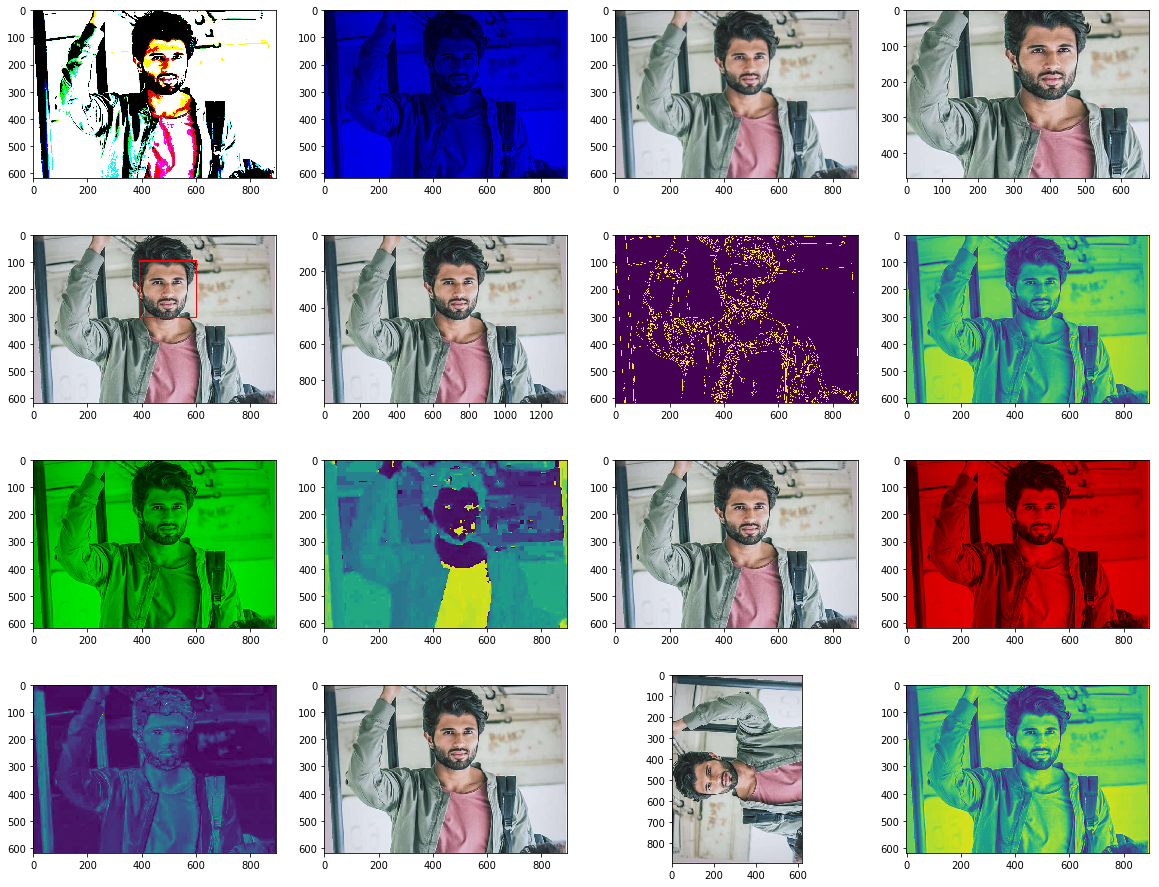

In [2]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
columns = 4
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)